# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: Estacio, Damien Marius\
_Student No._: 202113663\
_Section_: THY-TX-1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Damien Marius Miana Estacio

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



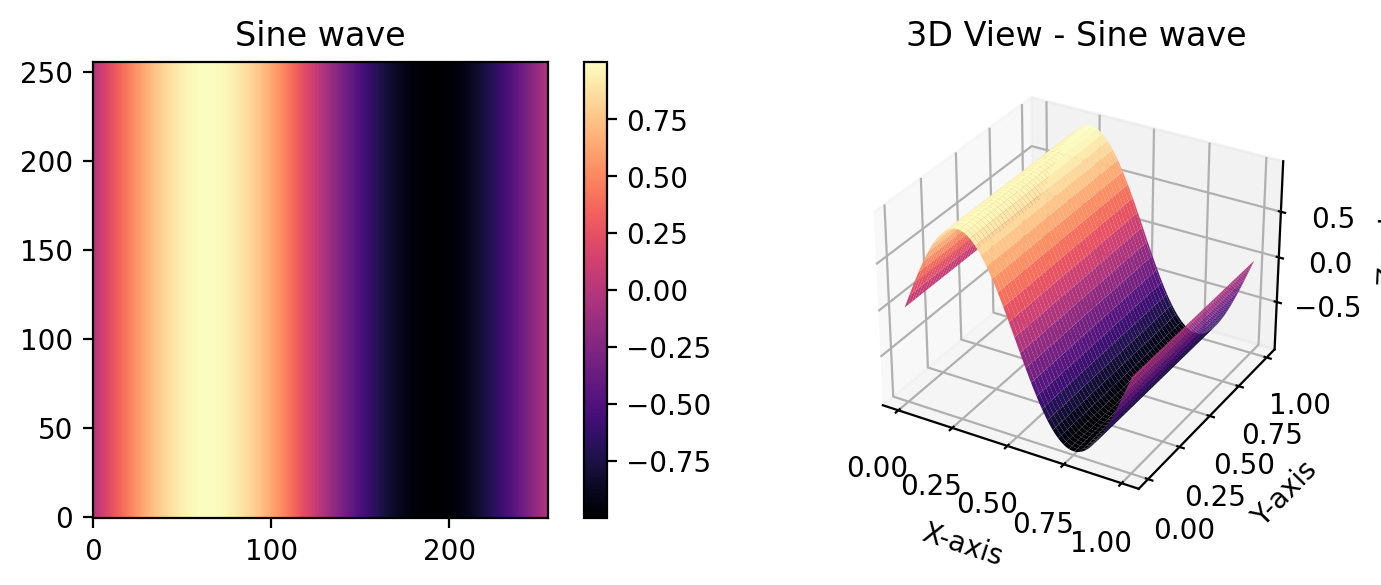

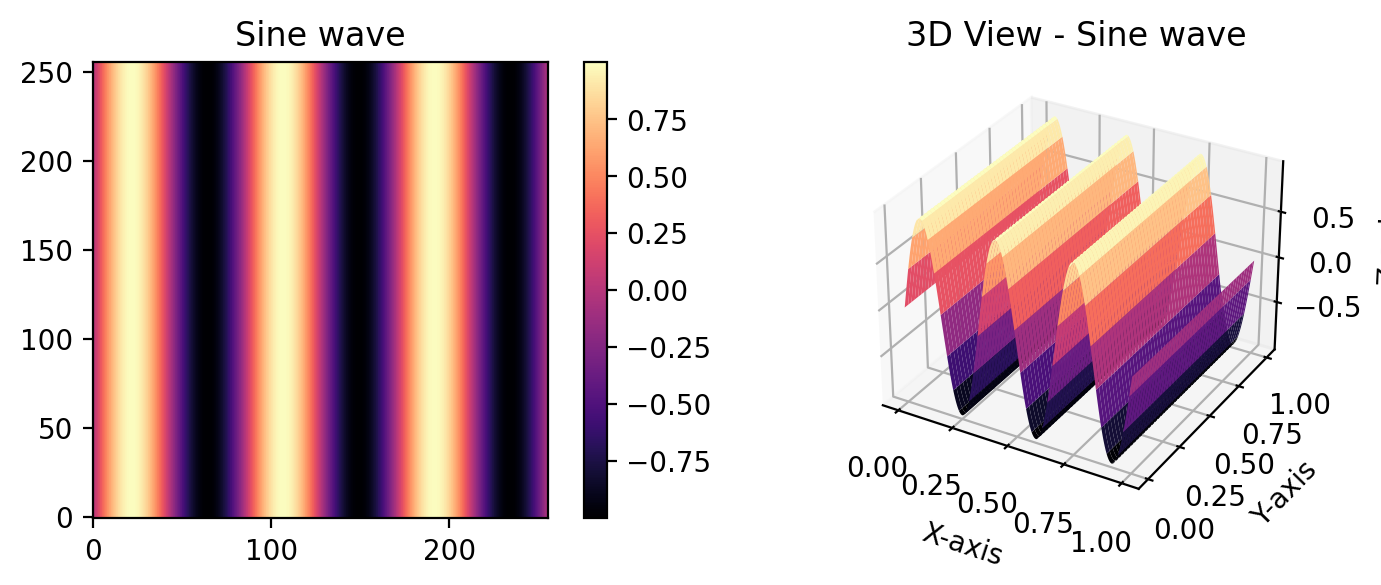

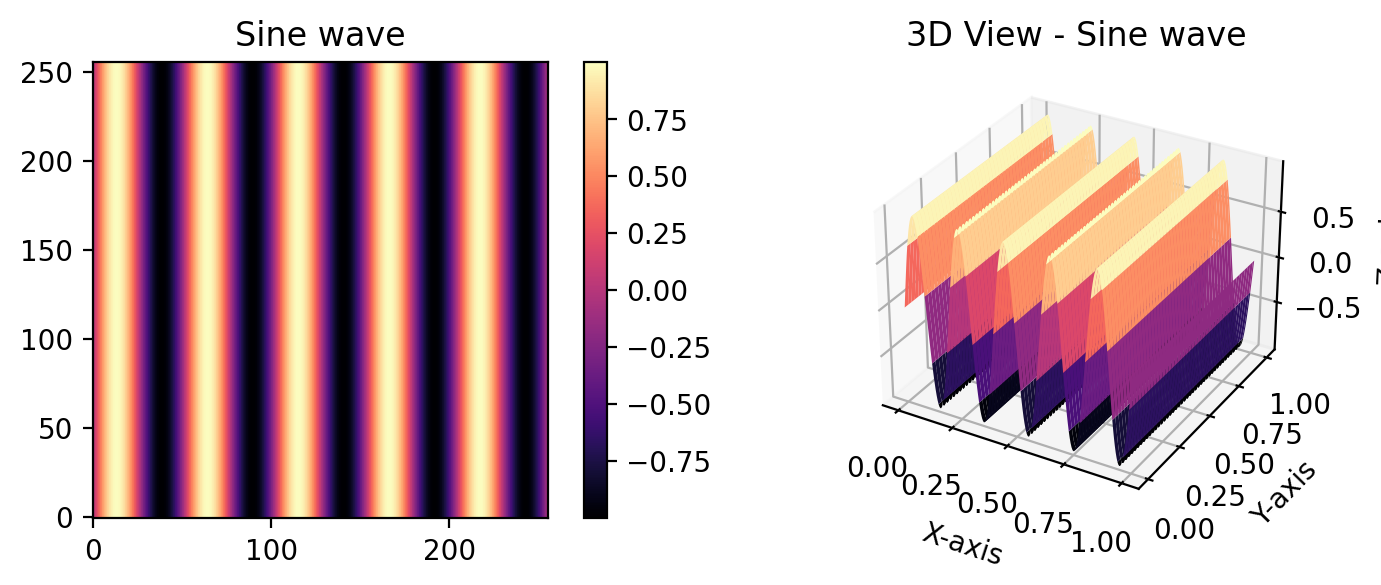

In [ ]:
N = 256
# Resolution
k = [1, 3, 5]

for n in k:
  xx = np.linspace(0, 1, N)
  X, Y = np.meshgrid(xx, xx)
  A = np.zeros((256,256))
  A[np.where(xx <= 1)] = np.sin(2*np.pi*(xx*n))
  #np.where(A[xx] < 1, A[xx*n], np.sin(2*np.pi*(xx*n)))

  cmap = "magma"

  fig = plt.figure(figsize = (8, 3), dpi = 200)
  plt.subplot(121)
  plt.title("Sine wave")
  plt.imshow(A, cmap = cmap, origin = "lower")
  plt.colorbar()

  ax = fig.add_subplot(122, projection='3d')
  ax.plot_surface(X, Y, A, cmap=cmap)

  ax.set_title("3D View - Sine wave")
  ax.set_xlabel("X-axis")
  ax.set_ylabel("Y-axis")
  ax.set_zlabel("Z-axis")
  ax.grid(True)

  plt.tight_layout()
  plt.show()
  print()

Sine waves of different frequencies are shown. The function sweeps over x-values, and the results are seen in the graphs. Colorbars help with the representation.

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

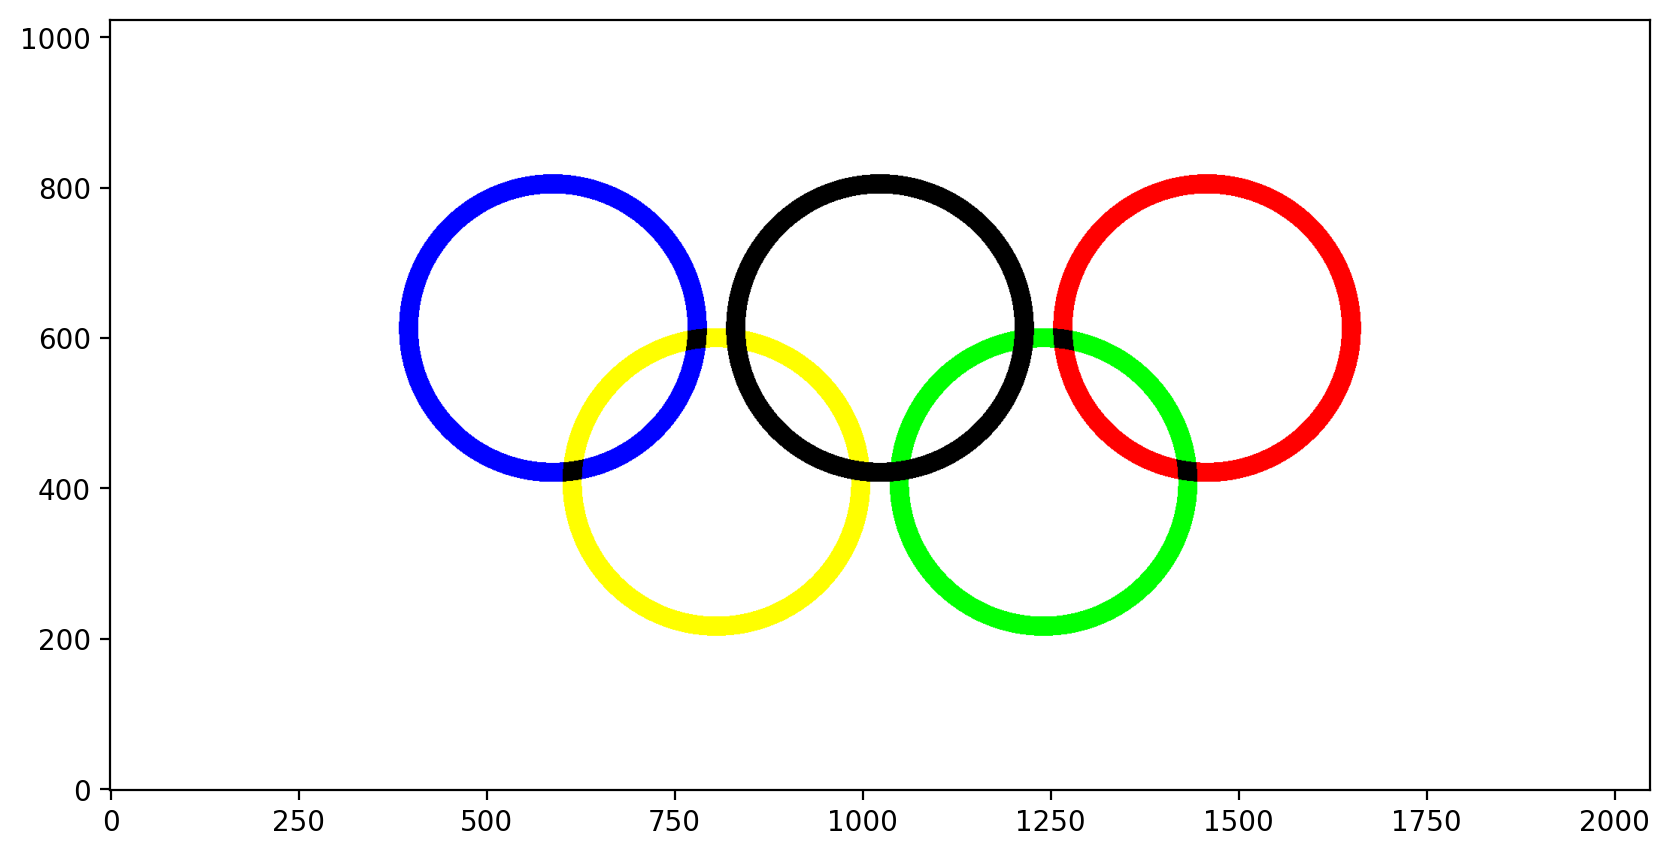

In [ ]:
Nx = 512*4
Ny = 256*4
# Resolution
x = np.linspace(-2, 2, Nx)
y = np.linspace(-1, 1, Ny)
X, Y = np.meshgrid(x, y)

Rd, Gn, Bl = np.zeros((Ny, Nx)), np.zeros((Ny, Nx)), np.zeros((Ny, Nx))
r1 = 0.4
r2 = 0.35

# Blue
R = np.sqrt((X + 0.85)**2 + (Y - 0.2)**2)
Rd[np.where((R < r1) & (R > r2))] = 1.0
R = np.sqrt((X + 0.85)**2 + (Y - 0.2)**2)
Gn[np.where((R < r1) & (R > r2))] = 1.0
# Yellow
R = np.sqrt((X + 0.425)**2 + (Y + 0.2)**2)
Bl[np.where((R < r1) & (R > r2))] = 1.0
# Black
R = np.sqrt((X)**2 + (Y - 0.2)**2)
Rd[np.where((R < r1) & (R > r2))] = 1.0
R = np.sqrt((X)**2 + (Y - 0.2)**2)
Gn[np.where((R < r1) & (R > r2))] = 1.0
R = np.sqrt((X)**2 + (Y - 0.2)**2)
Bl[np.where((R < r1) & (R > r2))] = 1.0
# Green
R = np.sqrt((X - 0.425)**2 + (Y + 0.2)**2)
Rd[np.where((R < r1) & (R > r2))] = 1.0
R = np.sqrt((X - 0.425)**2 + (Y + 0.2)**2)
Bl[np.where((R < r1) & (R > r2))] = 1.0
# Red
R = np.sqrt((X - 0.85)**2 + (Y - 0.2)**2)
Gn[np.where((R < r1) & (R > r2))] = 1.0
R = np.sqrt((X - 0.85)**2 + (Y - 0.2)**2)
Bl[np.where((R < r1) & (R > r2))] = 1.0

I_rgb = np.zeros((Ny, Nx, 3))
I_rgb[..., 0] = 1 - Rd
I_rgb[..., 1] = 1 - Gn
I_rgb[..., 2] = 1 - Bl

plt.figure(figsize=(10, 5), dpi=200)
plt.imshow(I_rgb, origin='lower')
plt.show()

A grid is created for the RGB values to be stored in. Since a zero value corresponds to black, it is easier to start with a 256 value corresponding to white. The necessary colors need only be subtracted from it to produce the desired pattern. The locations of the circles were determined through trial and error. It was noted that due to the nature of arrays, the x and y coordinates were switched.

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

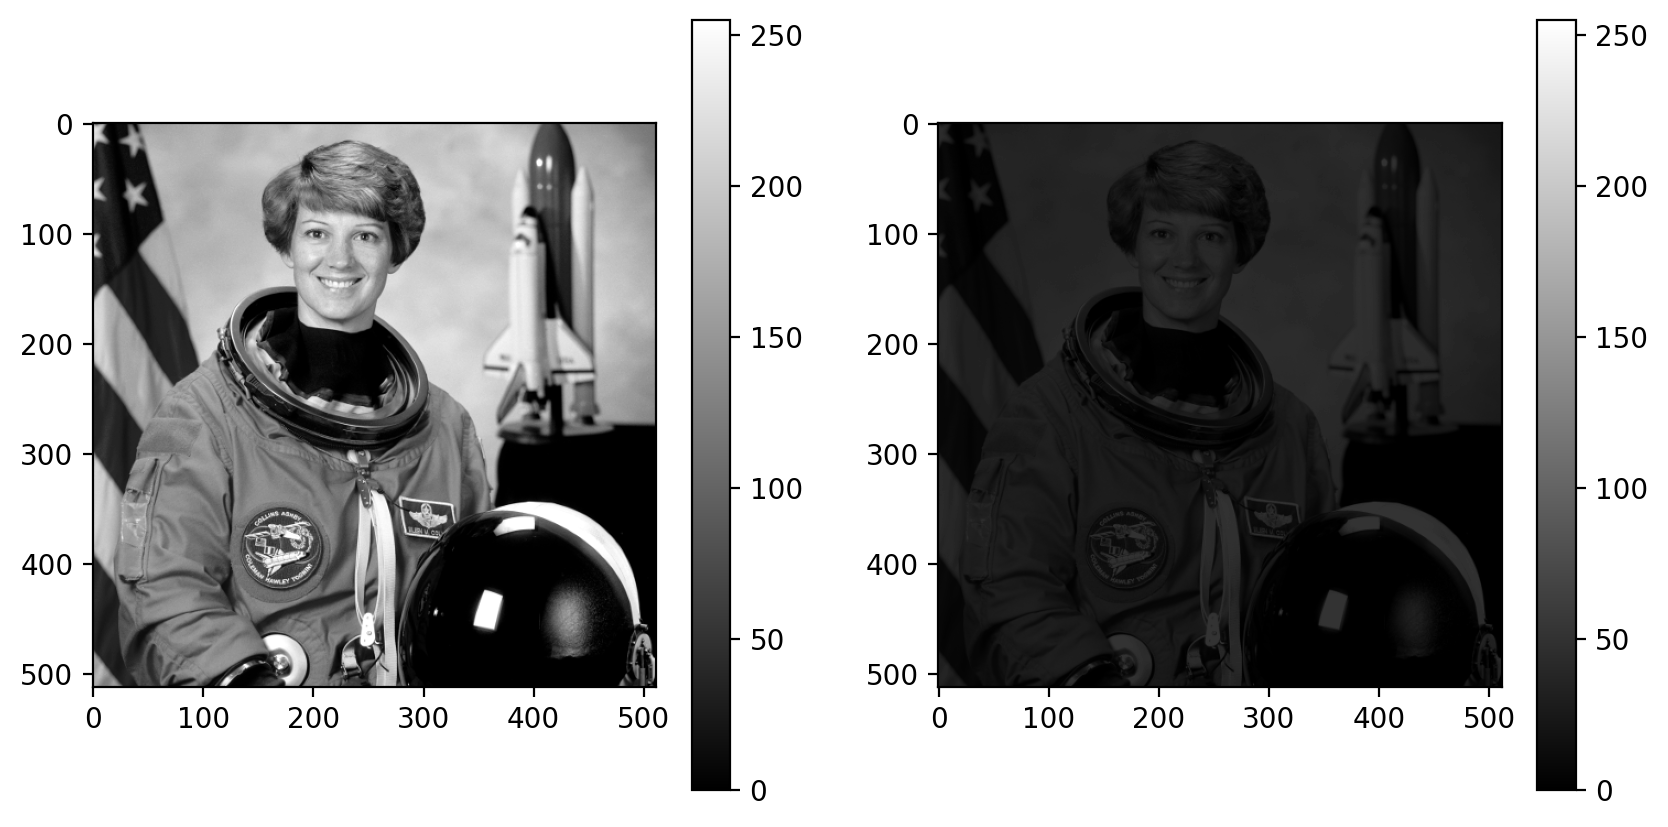

In [5]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

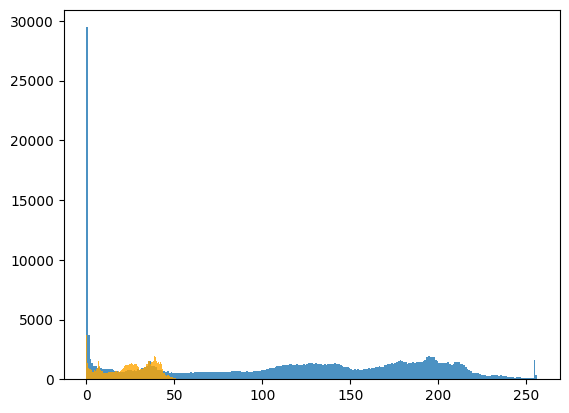

In [6]:
pdf1 = np.zeros(256)
pdf2 = np.zeros(256)
cdf1 = np.zeros(256)
cdf2 = np.zeros(256)

plt.hist(img.flatten(), bins = 256, alpha = 0.8)
plt.hist(img_low_contrast.flatten(), bins = 256, color = "orange", alpha = 0.8)
plt.show()

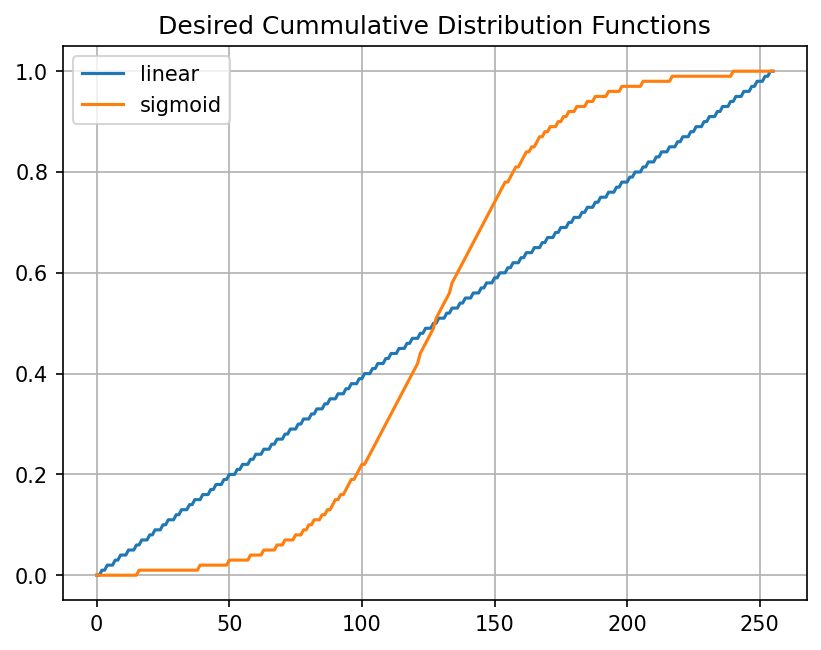

In [9]:
# Generate a linear cumulative distribution function (CDF) array
cdf_line = np.round(np.linspace(0, 1, 256), 2)

# Generate a CDF array using the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
cdf_sig = np.round(sigmoid(np.linspace(-6, 6, 256)), 2)

plt.figure(dpi = 150)
plt.grid()
plt.title('Desired Cummulative Distribution Functions')
plt.plot(cdf_line, label = 'linear')
plt.plot(cdf_sig, label = 'sigmoid')
plt.legend()

In [3]:
def backprojection(gray_value, cdf_desired, cdf_normalized):

    """
    Backprojection function for histogram matching.

    Parameters:
    - gray_value: The original gray value for which we want to find the corresponding value in the desired CDF.
    - cdf_desired: The desired Cumulative Distribution Function (CDF) to match.
    - cdf_normalized: The CDF of the original image that we want to adjust.

    Returns:
    - new_gray_value: The adjusted gray value that corresponds to the desired CDF.

    Explanation:
    This function performs backprojection, adjusting the gray value based on histogram matching.
    It finds the transformed value (T_r) in the normalized CDF, then maps it to the closest value in the desired CDF.
    The new gray value is the one that aligns with the desired CDF for better histogram matching.

    Example:
    Suppose gray_value is 100, and its normalized CDF value is 0.6.
    If in the desired CDF, the closest value to 0.6 is 110, then new_gray_value will be 110.

    Note:
    - This function assumes that cdf_desired and cdf_normalized are 1D arrays with values between 0 and 1.
    """
    # Get the T_r value from the normalized CDF
    T_r = cdf_normalized[gray_value]

    # Find the nearest value in the desired CDF to the rounded T_r value
    nearest_index = np.argmin(np.abs(cdf_desired - np.round(T_r, 2)))
    new_gray_value = nearest_index

    return new_gray_value

In [7]:
def histogram_back_projection(gray, cdf_desired):
    """
    Histogram back-projection with visualization.

    Parameters:
    - gray: Input grayscale image.
    - cdf_desired: Desired Cumulative Distribution Function (CDF) to match.

    Returns:
    - hbj: Histogram back-projected image.
    """

    # Initialize back-projection image
    hbj = np.zeros_like(gray)

    # Compute histogram and CDF of original image
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Apply back-projection to each pixel in the image
    for i in range(np.shape(hbj)[0]):
        for j in range(np.shape(hbj)[1]):
            gray_value = gray[i][j]
            hbj[i][j] = backprojection(gray_value, cdf_desired, cdf_normalized)

    # Compute histogram and CDF of histogram-manipulated image
    hist_, bins_ = np.histogram(hbj.flatten(), 256, [0, 256])
    cdf_ = hist_.cumsum()
    cdf_normalized_ = cdf_ / cdf_.max()

    # Plot Original and Histogram Manipulated Images
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].imshow(gray, cmap='gray', vmin=0, vmax=255)
    ax[0].set_title('Original')
    ax[1].imshow(hbj, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title('Histogram Manipulated')
    plt.tight_layout()
    plt.show()

    # Plot Probability Distribution Function (PDF) and Cumulative Distribution Function (CDF)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=150)
    ax[0].set_title('Probability Distribution Function')
    ax[0].hist(gray.flatten(), 256, [0, 256], color='r')
    ax[0].hist(hbj.flatten(), 256, [0, 256], color='b')
    ax[0].set_xlabel("Gray Value")
    ax[0].legend(('Original', 'Histogram Manipulated'))

    ax[1].set_title('Cumulative Distribution Function')
    ax[1].plot(cdf_normalized, 'r')
    ax[1].plot(cdf_normalized_, 'b')
    ax[1].set_xlabel("Gray Value")
    ax[1].legend(('Original', 'Histogram Manipulated'))
    plt.tight_layout()
    plt.show()

In [10]:
histogram_back_projection(img_low_contrast, cdf_line)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices